In [ ]:
# IMPORT NECESSARY LIBRARIES
import tensorflow as tf
from tensorflow.keras.layers import Input , Conv2D , MaxPooling2D , UpSampling2D , Concatenate , Dropout
from tensorflow.keras.models import Model
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import zipfile
import os
import random
import numpy as np

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# CHECKING
import os
import numpy as np

# Set the seed for reproducibility
seed = 42
np.random.seed(seed)

# Parent directory paths
PARENT_IMG_PATH = "/content/drive/MyDrive/Ultrasound/OTSU GAUSSIAN"
PARENT_MASK_PATH = "/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)"

# Function to get image and mask files in each subfolder
def get_files_in_subfolders(parent_img_path, parent_mask_path):
    # Get list of subfolders in the parent directory
    img_subfolders = [f.path for f in os.scandir(parent_img_path) if f.is_dir()]
    mask_subfolders = [f.path for f in os.scandir(parent_mask_path) if f.is_dir()]

    # Dictionary to store images and masks by subfolder
    data = {}

    for img_folder, mask_folder in zip(img_subfolders, mask_subfolders):
        img_files = os.listdir(img_folder)
        mask_files = os.listdir(mask_folder)

        # Store files for this subfolder
        data[os.path.basename(img_folder)] = {
            'images': img_files,
            'masks': mask_files
        }

    return data

# Get images and masks for all subfolders
dataset = get_files_in_subfolders(PARENT_IMG_PATH, PARENT_MASK_PATH)

# Example: Print the first folder's images and masks
first_folder = list(dataset.keys())[0]
print(f"Images in {first_folder}:", dataset[first_folder]['images'][:5])  # Print first 5 images
print(f"Masks in {first_folder}:", dataset[first_folder]['masks'][:5])  # Print first 5 masks


Images in Processed_Video 4_cropped_images: ['frame_0002.jpg', 'frame_0012.jpg', 'frame_0022.jpg', 'frame_0005.jpg', 'frame_0011.jpg']
Masks in Processed_Video 4_cropped_images: ['frame_0039.jpg', 'frame_0093.jpg', 'frame_0035.jpg', 'frame_0059.jpg', 'frame_0004.jpg']


<ipython-input-3-3a672ad058c5>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(img)


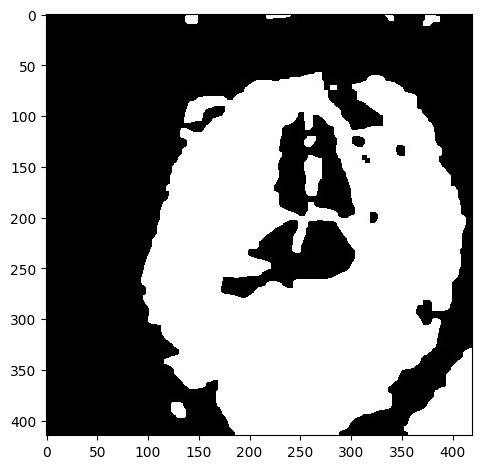

In [ ]:
img  = imread(os.path.join(PARENT_MASK_PATH, 'Video 3_cropped_images', 'frame_0000.jpg'))
imshow(img)

In [ ]:
# CHECKING THE EXISTENCE OF GROUND TRUTH
import os

PARENT_MASK_PATH = "/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)"

# Verify the directory exists
if os.path.exists(PARENT_MASK_PATH):
    print("Directory exists.")
else:
    print("Directory does not exist. Please check the path.")


Directory exists.


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

PARENT_MASK_PATH = "/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)"

# List all files in the directory (including hidden files)
for root, dirs, files in os.walk(PARENT_MASK_PATH):  # Use os.walk directly
  for file in files:
    print(os.path.join(root, file))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0039.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0093.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0035.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0059.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0004.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0075.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0042.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0068.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0048.jpg
/content/drive/M

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

PARENT_MASK_PATH = "/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)"


# List all files in the directory (including hidden files)
for root, dirs, files in os.walk(PARENT_MASK_PATH):  # Use os.walk directly
  for file in files:
    print(os.path.join(root, file))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0039.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0093.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0035.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0059.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0004.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0075.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0042.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0068.jpg
/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0048.jpg
/content/drive/M

In [ ]:
import os
from google.colab import drive

# Mount Google Drive (needed for Google Colab)
drive.mount('/content/drive')

# Path to the parent directory where images are stored
PARENT_MASK_PATH = "/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)"

# Initialize a dictionary to store the count of images for each subfolder
folder_image_count = {}

# Use os.walk to iterate over all directories and files in the directory
for root, dirs, files in os.walk(PARENT_MASK_PATH):
    # Filter files with valid image extensions (you can adjust this as per your needs)
    valid_extensions = ('.jpg', '.png', '.jpeg')
    image_files = [file for file in files if file.lower().endswith(valid_extensions)]

    # If there are image files in the folder, record the count and list them
    if image_files:
        folder_image_count[root] = len(image_files)
        print(f"\nFolder: {root}")
        print(f"Number of images: {len(image_files)}")
        for image in image_files:
            print(f"  {os.path.join(root, image)}")

# If you want to see the full dictionary of image counts per folder
print("\nSummary of image counts per folder:")
for folder, count in folder_image_count.items():
    print(f"{folder}: {count} images")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Folder: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images
Number of images: 238
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0039.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0093.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0035.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0059.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0004.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0075.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0042.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images

In [ ]:
# TO CHECK THE TOTAL NUMBER OF IMAGES IN THE GROUND TRUTH
import os
from google.colab import drive

# Mount Google Drive (needed for Google Colab)
drive.mount('/content/drive')

# Path to the parent directory where images are stored
PARENT_MASK_PATH = "/content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)"

# Initialize a dictionary to store the count of images for each subfolder
folder_image_count = {}

# Use os.walk to iterate over all directories and files in the directory
for root, dirs, files in os.walk(PARENT_MASK_PATH):
    # Filter files with valid image extensions (you can adjust this as per your needs)
    valid_extensions = ('.jpg', '.png', '.jpeg')
    image_files = [file for file in files if file.lower().endswith(valid_extensions)]

    # If there are image files in the folder, record the count and list them
    if image_files:
        folder_image_count[root] = len(image_files)
        print(f"\nFolder: {root}")
        print(f"Number of images: {len(image_files)}")
        for image in image_files:
            print(f"  {os.path.join(root, image)}")

# Calculate the total number of images across all subfolders
total_images = sum(folder_image_count.values())
print("\nSummary of image counts per folder:")
for folder, count in folder_image_count.items():
    print(f"{folder}: {count} images")

# Print the total number of images
print(f"\nTotal number of images across all folders: {total_images}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Folder: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images
Number of images: 238
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0039.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0093.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0035.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0059.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0004.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0075.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images/frame_0042.jpg
  /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images

In [ ]:
# TO CHECK THE TOTAL COUNT OF MASK AND GROUND TRUTH
import os

# Function to count images in a folder
def count_images(folder_path):
    if not os.path.exists(folder_path):
        print(f"❌ Folder not found: {folder_path}")
        return 0
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Ask for image folders one by one
image_folders = []
num_image_folders = int(input("Enter the number of image folders: "))
for i in range(num_image_folders):
    folder = input(f"Enter path for image folder {i+1}: ")
    image_folders.append(folder)

# Ask for mask folders one by one
mask_folders = []
num_mask_folders = int(input("Enter the number of mask folders: "))
for i in range(num_mask_folders):
    folder = input(f"Enter path for mask folder {i+1}: ")
    mask_folders.append(folder)

# Count and display the number of images in each folder
print("\n📂 Image Folder Counts:")
total_images = 0
for folder in image_folders:
    count = count_images(folder)
    total_images += count
    print(f"  🖼 {folder}: {count} images")

print("\n📂 Mask Folder Counts:")
total_masks = 0
for folder in mask_folders:
    count = count_images(folder)
    total_masks += count
    print(f"  🎭 {folder}: {count} masks")

# Final Summary
print("\n✅ Summary:")
print(f"  - Total Images: {total_images}")
print(f"  - Total Masks: {total_masks}")
if total_images == total_masks:
    print("🎉 Image and mask counts match!")
else:
    print("⚠️ Warning: Image and mask counts do NOT match!")


Enter the number of image folders: 4
Enter path for image folder 1: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 3_cropped_images
Enter path for image folder 2: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 4_cropped_images
Enter path for image folder 3: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 5_cropped_images
Enter path for image folder 4: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 6_cropped_images
Enter the number of mask folders: 4
Enter path for mask folder 1: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 3_cropped_images
Enter path for mask folder 2: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 4_cropped_images
Enter path for mask folder 3: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 5_cropped_images
Enter path for mask folder 4: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images

📂 Image Folder Counts:
  🖼 /content/drive/MyDrive/Ultrasou

In [ ]:
import os

# Function to get all filenames (without extensions) in a folder
def get_filenames(folder_path):
    if not os.path.exists(folder_path):
        print(f"❌ Folder not found: {folder_path}")
        return set()
    return {os.path.splitext(f)[0] for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))}

# Ask for image folders one by one
image_folders = []
num_image_folders = int(input("Enter the number of image folders: "))
for i in range(num_image_folders):
    folder = input(f"Enter path for image folder {i+1}: ")
    image_folders.append(folder)

# Ask for mask folders one by one
mask_folders = []
num_mask_folders = int(input("Enter the number of mask folders: "))
for i in range(num_mask_folders):
    folder = input(f"Enter path for mask folder {i+1}: ")
    mask_folders.append(folder)

# Collect all filenames from image and mask folders
image_files = set()
mask_files = set()

for folder in image_folders:
    image_files.update(get_filenames(folder))

for folder in mask_folders:
    mask_files.update(get_filenames(folder))

# Count and display the number of images and masks
total_images = len(image_files)
total_masks = len(mask_files)

print("\n✅ Summary:")
print(f"  - Total Unique Images: {total_images}")
print(f"  - Total Unique Masks: {total_masks}")

# Find missing images or masks
missing_masks = image_files - mask_files
missing_images = mask_files - image_files

if not missing_masks and not missing_images:
    print("🎉 All images have matching masks!")
else:
    print("⚠️ Warning: Image and mask counts do NOT match!")

    if missing_masks:
        print("\n🚨 Missing Masks for these Images:")
        for img in sorted(missing_masks):
            print(f"  ❌ {img}")

    if missing_images:
        print("\n🚨 Missing Images for these Masks:")
        for mask in sorted(missing_images):
            print(f"  ❌ {mask}")


Enter the number of image folders: 4
Enter path for image folder 1: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 3_cropped_images
Enter path for image folder 2: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 4_cropped_images
Enter path for image folder 3: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 5_cropped_images
Enter path for image folder 4: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 6_cropped_images
Enter the number of mask folders: 4
Enter path for mask folder 1: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 3_cropped_images
Enter path for mask folder 2: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 4_cropped_images
Enter path for mask folder 3: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 5_cropped_images
Enter path for mask folder 4: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images

✅ Summary:
  - Total Unique Images: 569
  - Total Unique M

In [ ]:
# TRAIN TEST SPLIT
import os
import shutil
import random

# Function to get all filenames (without extensions) in a folder
def get_filenames(folder_path):
    if not os.path.exists(folder_path):
        print(f"❌ Folder not found: {folder_path}")
        return set()
    return {os.path.splitext(f)[0] for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))}

# Ask for image folders one by one
image_folders = []
num_image_folders = int(input("Enter the number of image folders: "))
for i in range(num_image_folders):
    folder = input(f"Enter path for image folder {i+1}: ")
    image_folders.append(folder)

# Ask for mask folders one by one
mask_folders = []
num_mask_folders = int(input("Enter the number of mask folders: "))
for i in range(num_mask_folders):
    folder = input(f"Enter path for mask folder {i+1}: ")
    mask_folders.append(folder)

# Collect all filenames from image and mask folders
image_files = set()
mask_files = set()

for folder in image_folders:
    image_files.update(get_filenames(folder))

for folder in mask_folders:
    mask_files.update(get_filenames(folder))

# Count and display the number of images and masks
total_images = len(image_files)
total_masks = len(mask_files)

print("\n✅ Summary:")
print(f"  - Total Unique Images: {total_images}")
print(f"  - Total Unique Masks: {total_masks}")

# Find missing images or masks
missing_masks = image_files - mask_files
missing_images = mask_files - image_files

if missing_masks or missing_images:
    print("⚠️ Warning: Image and mask counts do NOT match!")

    if missing_masks:
        print("\n🚨 Missing Masks for these Images:")
        for img in sorted(missing_masks):
            print(f"  ❌ {img}")

    if missing_images:
        print("\n🚨 Missing Images for these Masks:")
        for mask in sorted(missing_images):
            print(f"  ❌ {mask}")
else:
    print("🎉 All images have matching masks!")

# Filter only valid pairs (images that have masks)
valid_files = list(image_files & mask_files)
random.shuffle(valid_files)  # Shuffle dataset

# Define train-test split ratio (80% train, 20% test)
split_ratio = 0.8
split_index = int(len(valid_files) * split_ratio)

train_files = valid_files[:split_index]
test_files = valid_files[split_index:]

print("\n📂 Splitting Dataset:")
print(f"  - Training Set: {len(train_files)} images")
print(f"  - Testing Set: {len(test_files)} images")

# Define output directories
output_base = input("\nEnter the output directory for train-test split (e.g., /path/to/dataset): ").strip()
train_img_dir = os.path.join(output_base, "train", "images")
train_mask_dir = os.path.join(output_base, "train", "masks")
test_img_dir = os.path.join(output_base, "test", "images")
test_mask_dir = os.path.join(output_base, "test", "masks")

# Create train/test directories
for folder in [train_img_dir, train_mask_dir, test_img_dir, test_mask_dir]:
    os.makedirs(folder, exist_ok=True)

# Function to copy files to train/test folders
def copy_files(file_list, source_folders, dest_folder, extension):
    for file_name in file_list:
        for folder in source_folders:
            src_file = os.path.join(folder, file_name + extension)
            if os.path.exists(src_file):
                shutil.copy(src_file, os.path.join(dest_folder, file_name + extension))
                break  # Stop searching once file is found

# Copy images and masks to train/test folders
print("\n🚀 Copying files...")

# Copy train images and masks
copy_files(train_files, image_folders, train_img_dir, ".png")  # Change extension if needed
copy_files(train_files, mask_folders, train_mask_dir, ".png")

# Copy test images and masks
copy_files(test_files, image_folders, test_img_dir, ".png")
copy_files(test_files, mask_folders, test_mask_dir, ".png")

print("\n✅ Train-Test Split Completed!")
print(f"📂 Training Images: {train_img_dir}")
print(f"📂 Training Masks: {train_mask_dir}")
print(f"📂 Testing Images: {test_img_dir}")
print(f"📂 Testing Masks: {test_mask_dir}")


Enter the number of image folders: 4
Enter path for image folder 1: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 3_cropped_images
Enter path for image folder 2: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 4_cropped_images
Enter path for image folder 3: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 5_cropped_images
Enter path for image folder 4: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 6_cropped_images
Enter the number of mask folders: 4
Enter path for mask folder 1: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 3_cropped_images
Enter path for mask folder 2: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 4_cropped_images
Enter path for mask folder 3: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 5_cropped_images
Enter path for mask folder 4: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images

✅ Summary:
  - Total Unique Images: 569
  - Total Unique M

Enter the number of image folders: 4
Enter path for image folder 1: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 3_cropped_images
Enter path for image folder 2: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 4_cropped_images
Enter path for image folder 3: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 5_cropped_images
Enter path for image folder 4: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 6_cropped_images
Enter the number of mask folders: 4
Enter path for mask folder 1: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 3_cropped_images
Enter path for mask folder 2: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 4_cropped_images
Enter path for mask folder 3: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 5_cropped_images
Enter path for mask folder 4: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images


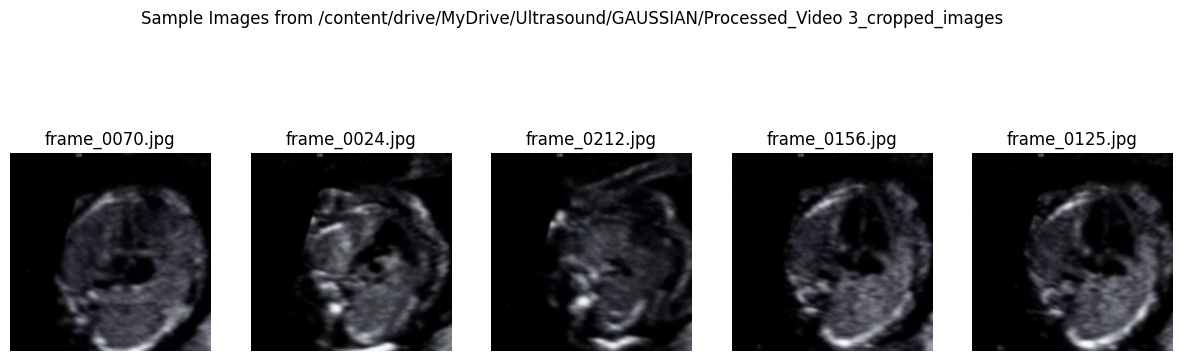

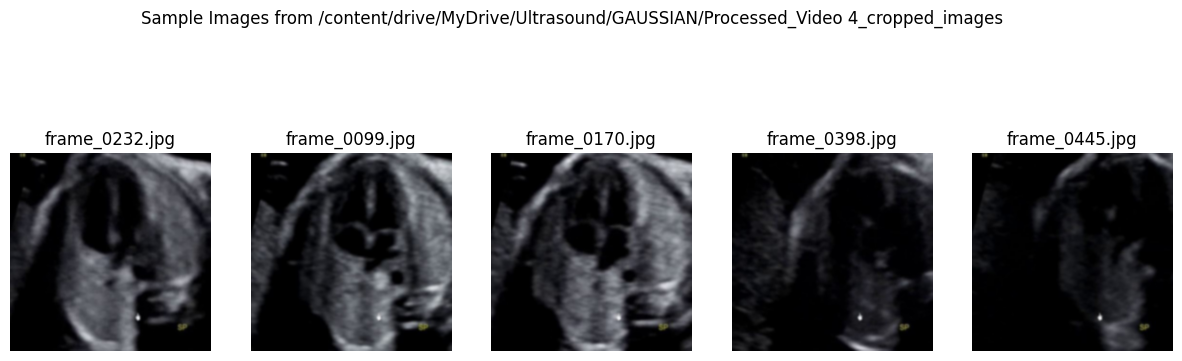

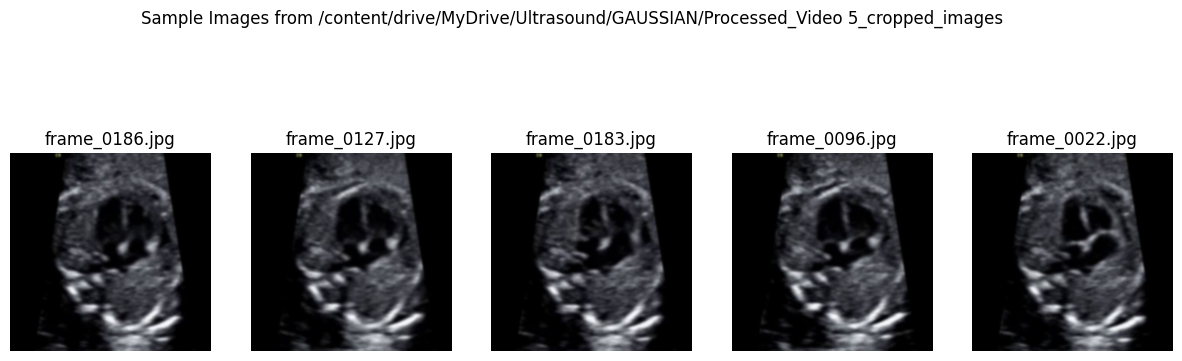

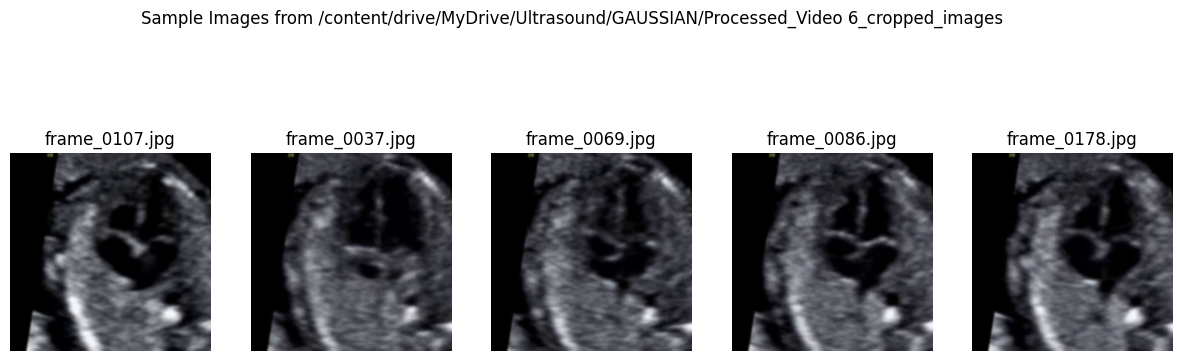

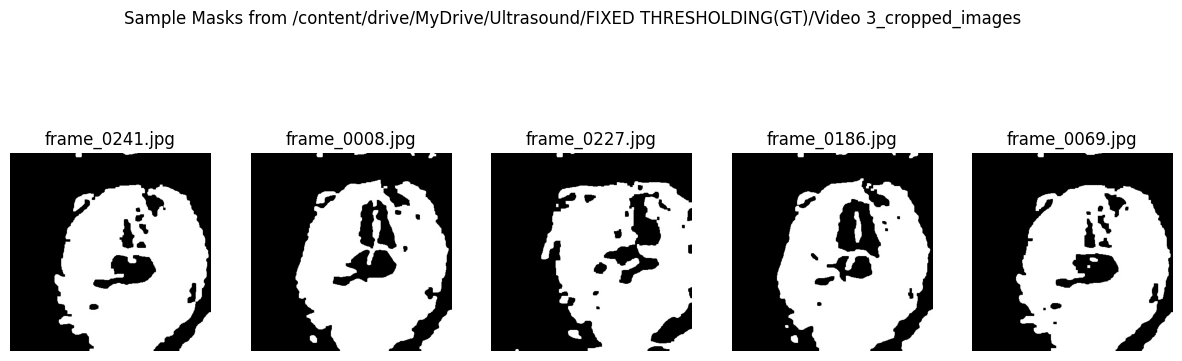

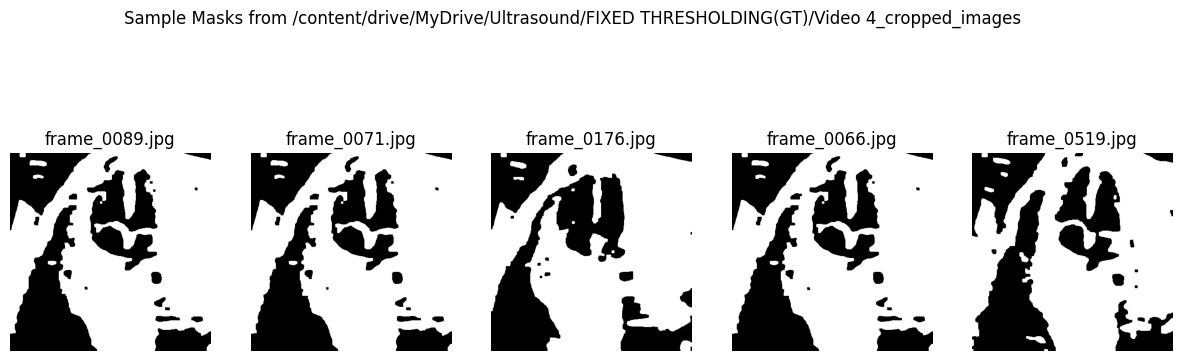

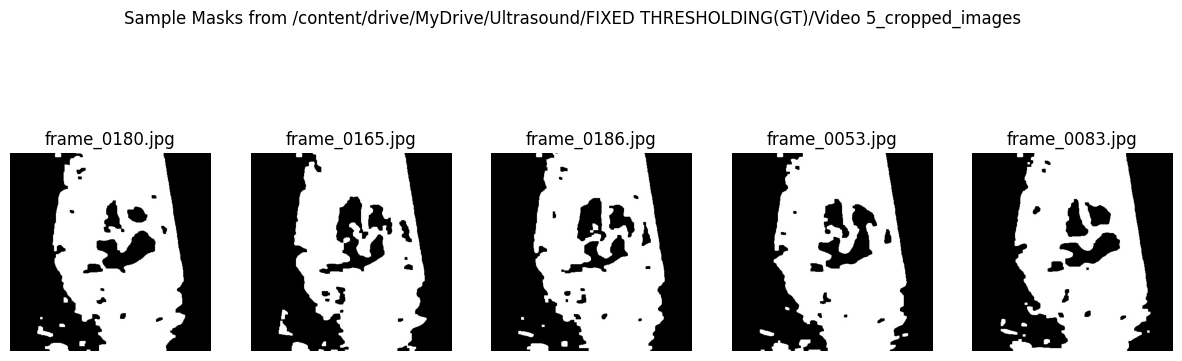

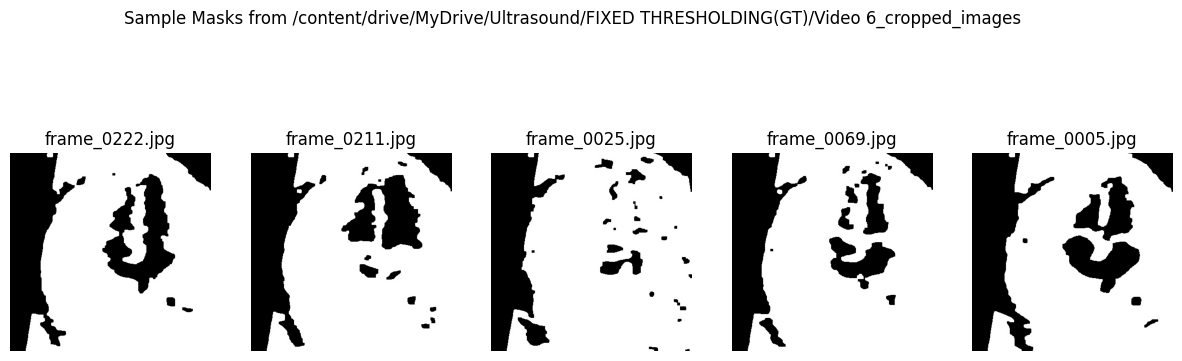

In [ ]:
# TO DISPLAY THE TRAIN TEST IMAGES
import os
import shutil
import random
import matplotlib.pyplot as plt
import cv2

# Function to get all filenames (without extensions) in a folder
def get_filenames(folder_path, extensions=(".png", ".jpg", ".jpeg", ".tif")):
    if not os.path.exists(folder_path):
        print(f"❌ Folder not found: {folder_path}")
        return set()
    return {
        os.path.splitext(f)[0]
        for f in os.listdir(folder_path)
        if os.path.isfile(os.path.join(folder_path, f)) and f.endswith(extensions)
    }

# Function to display 5 random images from a folder
def display_images_from_folder(folder, title="Images"):
    if not os.path.exists(folder):
        print(f"❌ Folder not found: {folder}")
        return

    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder) if f.endswith((".png", ".jpg", ".jpeg", ".tif"))]

    if not image_files:
        print(f"⚠️ No images found in {folder}")
        return

    # Select up to 5 random images
    selected_images = random.sample(image_files, min(5, len(image_files)))

    # Display images
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)  # Read image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_name)

    plt.suptitle(title)
    plt.show()

# Ask for image folders one by one
image_folders = []
num_image_folders = int(input("Enter the number of image folders: "))
for i in range(num_image_folders):
    folder = input(f"Enter path for image folder {i+1}: ").strip()
    image_folders.append(folder)

# Ask for mask folders one by one
mask_folders = []
num_mask_folders = int(input("Enter the number of mask folders: "))
for i in range(num_mask_folders):
    folder = input(f"Enter path for mask folder {i+1}: ").strip()
    mask_folders.append(folder)

# Display 5 random images from each image folder
for folder in image_folders:
    display_images_from_folder(folder, title=f"Sample Images from {folder}")

# Display 5 random images from each mask folder
for folder in mask_folders:
    display_images_from_folder(folder, title=f"Sample Masks from {folder}")


Enter the number of image folders: 4
Enter path for image folder 1: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 3_cropped_images
Enter path for image folder 2: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 4_cropped_images
Enter path for image folder 3: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 5_cropped_images
Enter path for image folder 4: /content/drive/MyDrive/Ultrasound/GAUSSIAN/Processed_Video 6_cropped_images
Enter the number of mask folders: 4
Enter path for mask folder 1: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 3_cropped_images
Enter path for mask folder 2: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 4_cropped_images
Enter path for mask folder 3: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 5_cropped_images
Enter path for mask folder 4: /content/drive/MyDrive/Ultrasound/FIXED THRESHOLDING(GT)/Video 6_cropped_images


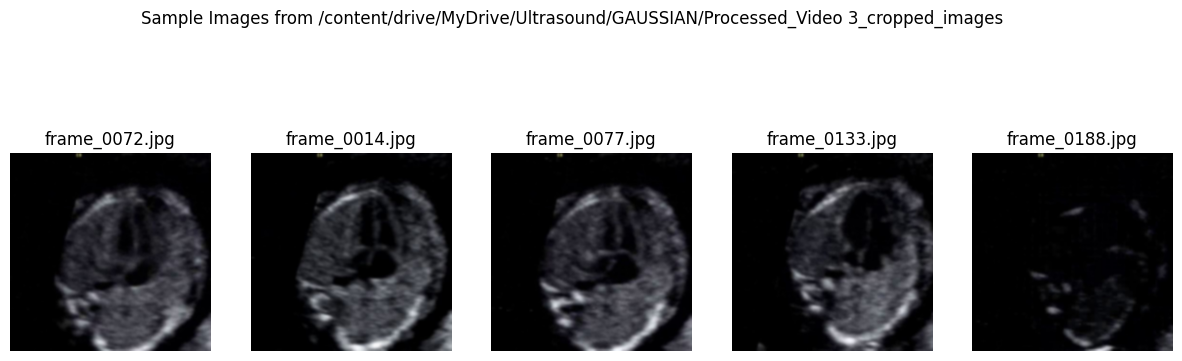

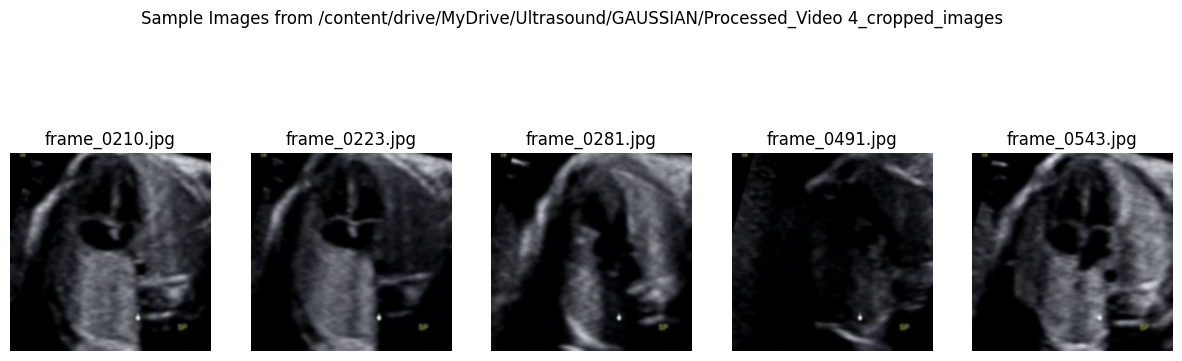

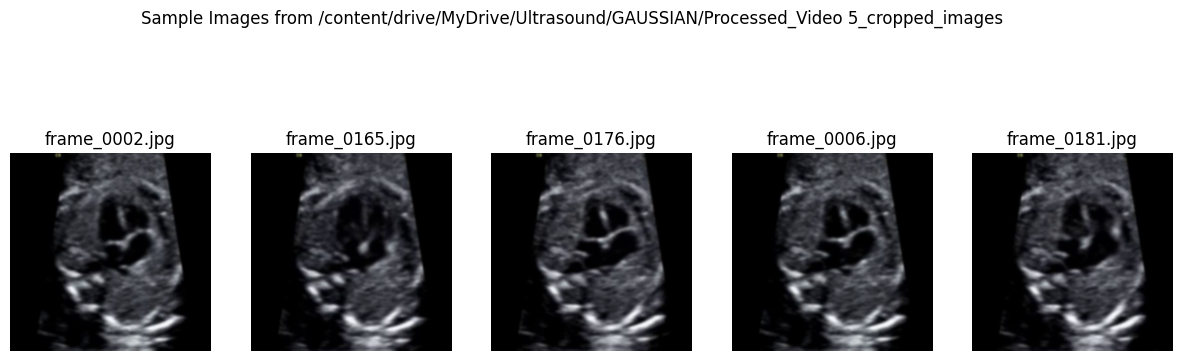

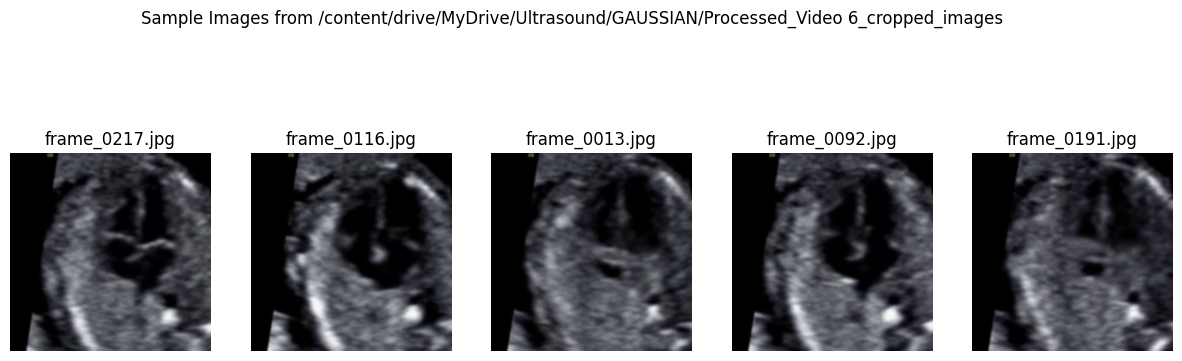

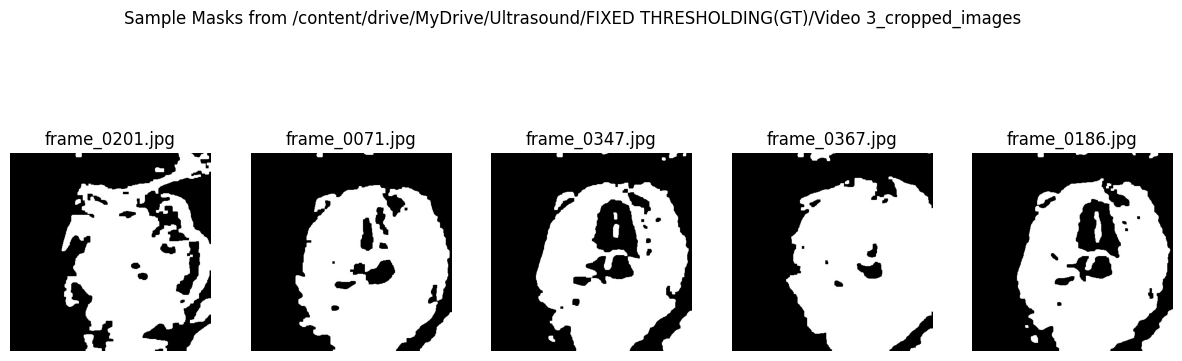

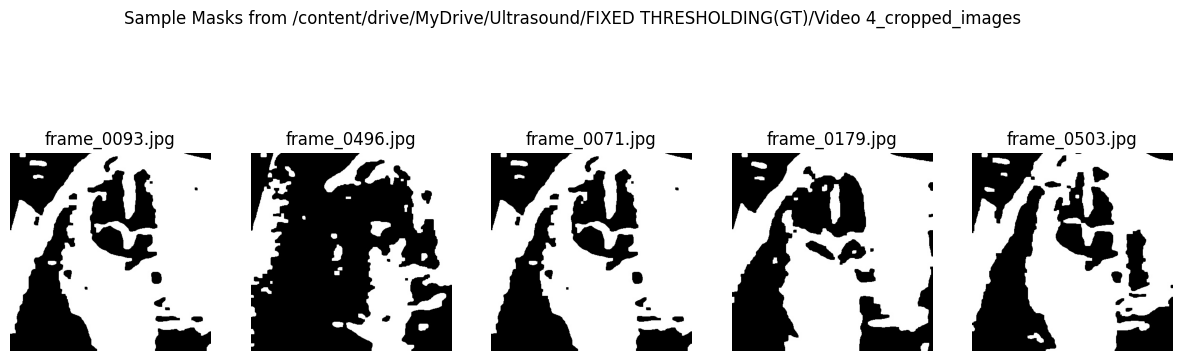

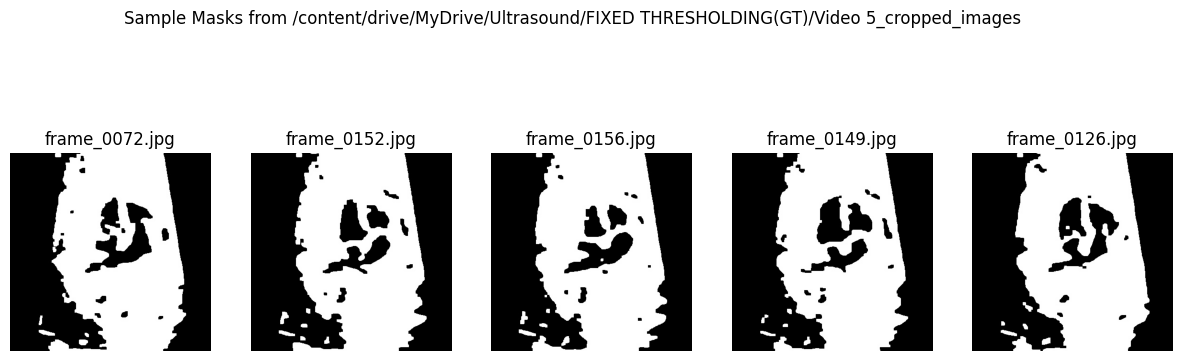

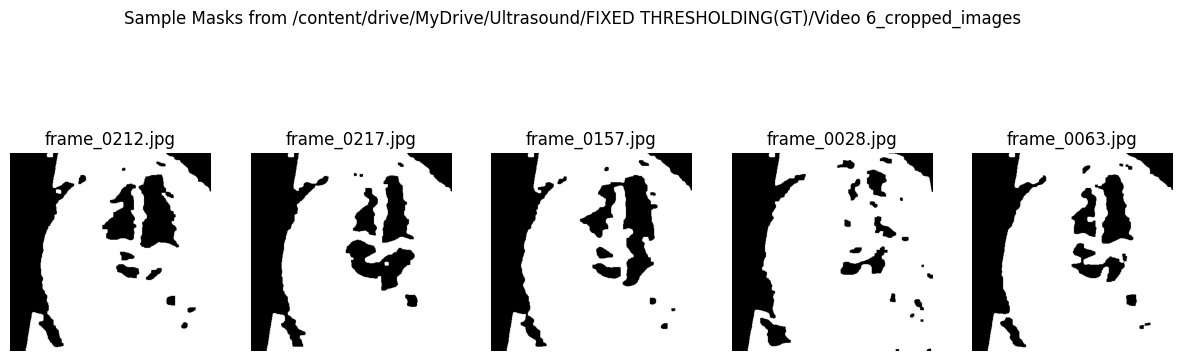


✅ Summary:
  - Total Unique Images: 569
  - Total Unique Masks: 569
🎉 All images have matching masks!

📂 Splitting Dataset:
  - Training Set: 455 images
  - Testing Set: 114 images

Enter the output directory for train-test split (e.g., /path/to/dataset): /content/drive/MyDrive/Ultrasound/train-test-split

🚀 Copying files...

✅ Train-Test Split Completed!
📂 Training Images: /content/drive/MyDrive/Ultrasound/train-test-split/train/images
📂 Training Masks: /content/drive/MyDrive/Ultrasound/train-test-split/train/masks
📂 Testing Images: /content/drive/MyDrive/Ultrasound/train-test-split/test/images
📂 Testing Masks: /content/drive/MyDrive/Ultrasound/train-test-split/test/masks


In [ ]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import cv2

# Function to get all filenames (without extensions) in a folder
def get_filenames(folder_path, extensions=(".png", ".jpg", ".jpeg", ".tif")):
    if not os.path.exists(folder_path):
        print(f"❌ Folder not found: {folder_path}")
        return set()
    return {
        os.path.splitext(f)[0]
        for f in os.listdir(folder_path)
        if os.path.isfile(os.path.join(folder_path, f)) and f.endswith(extensions)
    }

# Function to display 5 random images from a folder
def display_images_from_folder(folder, title="Images"):
    if not os.path.exists(folder):
        print(f"❌ Folder not found: {folder}")
        return

    image_files = [f for f in os.listdir(folder) if f.endswith((".png", ".jpg", ".jpeg", ".tif"))]

    if not image_files:
        print(f"⚠️ No images found in {folder}")
        return

    selected_images = random.sample(image_files, min(5, len(image_files)))

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_name)

    plt.suptitle(title)
    plt.show()

# Ask for image folders
image_folders = []
num_image_folders = int(input("Enter the number of image folders: "))
for i in range(num_image_folders):
    folder = input(f"Enter path for image folder {i+1}: ").strip()
    image_folders.append(folder)

# Ask for mask folders
mask_folders = []
num_mask_folders = int(input("Enter the number of mask folders: "))
for i in range(num_mask_folders):
    folder = input(f"Enter path for mask folder {i+1}: ").strip()
    mask_folders.append(folder)

# Display sample images from image and mask folders
for folder in image_folders:
    display_images_from_folder(folder, title=f"Sample Images from {folder}")

for folder in mask_folders:
    display_images_from_folder(folder, title=f"Sample Masks from {folder}")

# Collect all unique filenames from image and mask folders
image_files = set()
mask_files = set()

for folder in image_folders:
    image_files.update(get_filenames(folder))

for folder in mask_folders:
    mask_files.update(get_filenames(folder))

# Count images and masks
total_images = len(image_files)
total_masks = len(mask_files)

print("\n✅ Summary:")
print(f"  - Total Unique Images: {total_images}")
print(f"  - Total Unique Masks: {total_masks}")

# Find missing images/masks
missing_masks = image_files - mask_files
missing_images = mask_files - image_files

if missing_masks or missing_images:
    print("⚠️ Warning: Image and mask counts do NOT match!")
    if missing_masks:
        print("\n🚨 Missing Masks for these Images:")
        for img in sorted(missing_masks):
            print(f"  ❌ {img}")
    if missing_images:
        print("\n🚨 Missing Images for these Masks:")
        for mask in sorted(missing_images):
            print(f"  ❌ {mask}")
else:
    print("🎉 All images have matching masks!")

# Select valid image-mask pairs
valid_files = list(image_files & mask_files)
random.shuffle(valid_files)

# Train-Test split (80% Train, 20% Test)
split_ratio = 0.8
split_index = int(len(valid_files) * split_ratio)

train_files = valid_files[:split_index]
test_files = valid_files[split_index:]

print("\n📂 Splitting Dataset:")
print(f"  - Training Set: {len(train_files)} images")
print(f"  - Testing Set: {len(test_files)} images")

# Define output directories
output_base = input("\nEnter the output directory for train-test split (e.g., /path/to/dataset): ").strip()
train_img_dir = os.path.join(output_base, "train", "images")
train_mask_dir = os.path.join(output_base, "train", "masks")
test_img_dir = os.path.join(output_base, "test", "images")
test_mask_dir = os.path.join(output_base, "test", "masks")

# Create train/test directories
for folder in [train_img_dir, train_mask_dir, test_img_dir, test_mask_dir]:
    os.makedirs(folder, exist_ok=True)

# Function to copy files to train/test folders
def copy_files(file_list, source_folders, dest_folder, extensions):
    for file_name in file_list:
        for folder in source_folders:
            for ext in extensions:
                src_file = os.path.join(folder, file_name + ext)
                if os.path.exists(src_file):
                    shutil.copy(src_file, os.path.join(dest_folder, file_name + ext))
                    break  # Stop searching once file is found

# Copy images and masks to train/test folders
print("\n🚀 Copying files...")

copy_files(train_files, image_folders, train_img_dir, [".png", ".jpg", ".jpeg", ".tif"])
copy_files(train_files, mask_folders, train_mask_dir, [".png", ".jpg", ".jpeg", ".tif"])

copy_files(test_files, image_folders, test_img_dir, [".png", ".jpg", ".jpeg", ".tif"])
copy_files(test_files, mask_folders, test_mask_dir, [".png", ".jpg", ".jpeg", ".tif"])

print("\n✅ Train-Test Split Completed!")
print(f"📂 Training Images: {train_img_dir}")
print(f"📂 Training Masks: {train_mask_dir}")
print(f"📂 Testing Images: {test_img_dir}")
print(f"📂 Testing Masks: {test_mask_dir}")


In [ ]:
# TO FIND THE SHAPES
import numpy as np
import os
import cv2
from tensorflow.keras.utils import to_categorical

# Define image size
IMG_HEIGHT, IMG_WIDTH = 256, 256  # Change based on your dataset

# Paths to your train and test sets
train_img_path = "/content/drive/MyDrive/Ultrasound/train-test-split/train/images"
train_mask_path = "/content/drive/MyDrive/Ultrasound/train-test-split/train/masks"
test_img_path =   "/content/drive/MyDrive/Ultrasound/train-test-split/test/images"
test_mask_path =  "/content/drive/MyDrive/Ultrasound/train-test-split/test/masks"

# Function to load images
def load_images_from_folder(folder):
    images = []
    filenames = sorted(os.listdir(folder))  # Sort to match images and masks
    for filename in filenames:
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            images.append(img)
    return np.array(images)

# Load datasets
X_train = load_images_from_folder(train_img_path) / 255.0  # Normalize images
X_test = load_images_from_folder(test_img_path) / 255.0
Y_train = load_images_from_folder(train_mask_path)[:, :, :, 0]  # Use single channel for masks
Y_test = load_images_from_folder(test_mask_path)[:, :, :, 0]

# Reshape masks to match U-Net input
Y_train = np.expand_dims(Y_train, axis=-1) / 255.0  # Normalize to [0,1]
Y_test = np.expand_dims(Y_test, axis=-1) / 255.0

print(f"✅ X_train shape: {X_train.shape}")
print(f"✅ Y_train shape: {Y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}")
print(f"✅ Y_test shape: {Y_test.shape}")


✅ X_train shape: (455, 256, 256, 3)
✅ Y_train shape: (455, 256, 256, 1)
✅ X_test shape: (114, 256, 256, 3)
✅ Y_test shape: (114, 256, 256, 1)


In [ ]:
def load_images_from_folder(folder):
    images = []
    filenames = sorted(os.listdir(folder))  # Ensure masks match images
    for filename in filenames:
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            img = cv2.resize(img, (256, 256))
            images.append(img)
    return np.array(images)

# Load grayscale images
X_train = load_images_from_folder(train_img_path) / 255.0
X_test = load_images_from_folder(test_img_path) / 255.0

# Expand dimensions to match model input (455, 256, 256, 1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(f"✅ Fixed X_train shape: {X_train.shape}")  # Should be (455, 256, 256, 1)


✅ Fixed X_train shape: (455, 256, 256, 1)


In [ ]:
import os
import numpy as np
import cv2

# Function to load grayscale images from a folder
def load_images_from_folder(folder):
    images = []
    filenames = sorted(os.listdir(folder))  # Ensure masks match images
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            img = cv2.resize(img, (256, 256))  # Resize if needed
            images.append(img)

    return np.array(images)

# Provide paths for train and test images
train_img_path = input("Enter train images folder path: ").strip()
test_img_path = input("Enter test images folder path: ").strip()

# Load grayscale images
X_train = load_images_from_folder(train_img_path) / 255.0  # Normalize
X_test = load_images_from_folder(test_img_path) / 255.0

# Expand dimensions to match U-Net input (batch, height, width, channels)
X_train = np.expand_dims(X_train, axis=-1)  # (N, 256, 256) → (N, 256, 256, 1)
X_test = np.expand_dims(X_test, axis=-1)

print(f"✅ X_train shape: {X_train.shape}")  # Should be (num_images, 256, 256, 1)
print(f"✅ X_test shape: {X_test.shape}")


Enter train images folder path: /content/drive/MyDrive/Ultrasound/train-test-split/train/images
Enter test images folder path: /content/drive/MyDrive/Ultrasound/train-test-split/test/images
✅ X_train shape: (455, 256, 256, 1)
✅ X_test shape: (114, 256, 256, 1)


In [ ]:
import numpy as np
from skimage.filters import threshold_otsu
from PIL import Image
from tqdm import tqdm

# Define image dimensions
IMG_HEIGHT = 350  # Or the desired height
IMG_WIDTH = 300   # Or the desired width
IMG_CHANNELS = 1  # Grayscale images

# Initialize numpy arrays for images and masks
X_train = np.zeros((len(train_data), IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)
Y_train = np.zeros((len(train_data), IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)

for n, id_ in tqdm(enumerate(train_data), total=len(train_data)):
    img_path = IMG_PATH + id_
    mask_path = MASK_PATH + id_

    # Load both image and mask as grayscale
    img = Image.open(img_path).convert("L")  # Convert to grayscale (1 channel)
    mask = Image.open(mask_path).convert("L")  # Convert to grayscale (1 channel)

    # Resize images to the desired dimensions
    img = img.resize((IMG_WIDTH, IMG_HEIGHT))
    mask = mask.resize((IMG_WIDTH, IMG_HEIGHT))

    img_array = np.array(img)  # Directly store grayscale image (H, W)
    mask_array = np.array(mask)  # Directly store grayscale mask (H, W)

    # Apply Otsu thresholding to the mask
    threshold_value = threshold_otsu(mask_array)
    mask_binary = (mask_array > threshold_value).astype(np.uint8)  # Convert mask to binary (0/1)

    X_train[n] = img_array  # Store image (grayscale)
    Y_train[n] = mask_binary  # Store Otsu-thresholded mask (binary)

print(f"✅ Processed {len(train_data)} grayscale images and Otsu-thresholded masks!")

100%|██████████| 455/455 [00:07<00:00, 58.76it/s]

✅ Processed 455 grayscale images and Otsu-thresholded masks!


In [ ]:
import os
import numpy as np
from skimage.filters import threshold_otsu
from PIL import Image
from tqdm import tqdm
from google.colab import drive

# 1️⃣ **Mount Google Drive**
drive.mount('/content/drive')

# 2️⃣ **Define Paths** (Make sure these paths are correct)
IMG_PATH = "/content/drive/MyDrive/Ultrasound/train-test-split/train/images/"
MASK_PATH = "/content/drive/MyDrive/Ultrasound/train-test-split/train/masks/"

# 3️⃣ **Verify if Paths Exist**
if not os.path.exists(IMG_PATH):
    raise FileNotFoundError(f"❌ Image path not found: {IMG_PATH}")
if not os.path.exists(MASK_PATH):
    raise FileNotFoundError(f"❌ Mask path not found: {MASK_PATH}")

# 4️⃣ **Check Available Files**
print("✅ Available image files:", os.listdir(IMG_PATH)[:5])  # Print first 5 files for verification
print("✅ Available mask files:", os.listdir(MASK_PATH)[:5])

# 5️⃣ **Load File Names**
train_data = os.listdir(IMG_PATH)  # Get all filenames from the image directory
train_data = [f for f in train_data if f.endswith(('.png', '.jpg', '.jpeg'))]  # Ensure valid image formats

# 6️⃣ **Define Image Dimensions**
IMG_HEIGHT = 350  # Adjust as needed
IMG_WIDTH = 300
IMG_CHANNELS = 1  # Grayscale

# 7️⃣ **Initialize Numpy Arrays for Images & Masks**
X_train = np.zeros((len(train_data), IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)
Y_train = np.zeros((len(train_data), IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)

# 8️⃣ **Process Each Image**
for n, id_ in tqdm(enumerate(train_data), total=len(train_data)):
    img_path = os.path.join(IMG_PATH, id_)
    mask_path = os.path.join(MASK_PATH, id_)  # Ensure mask filename matches image filename

    # Debugging: Check if file exists
    if not os.path.exists(img_path):
        print(f"❌ File not found: {img_path}")
        continue
    if not os.path.exists(mask_path):
        print(f"❌ Mask not found: {mask_path}")
        continue

    # Load images and masks as grayscale
    img = Image.open(img_path).convert("L")  # Convert to grayscale
    mask = Image.open(mask_path).convert("L")

    # Resize images to desired dimensions
    img = img.resize((IMG_WIDTH, IMG_HEIGHT))
    mask = mask.resize((IMG_WIDTH, IMG_HEIGHT))

    img_array = np.array(img)  # Convert to NumPy array
    mask_array = np.array(mask)

    # Apply Otsu thresholding to masks
    threshold_value = threshold_otsu(mask_array)
    mask_binary = (mask_array > threshold_value).astype(np.uint8)  # Convert mask to binary

    # Store processed images & masks
    X_train[n] = img_array
    Y_train[n] = mask_binary

print(f"✅ Successfully processed {len(train_data)} images and Otsu-thresholded masks!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Available image files: ['frame_0082.jpg', 'frame_0380.jpg', 'frame_0251.jpg', 'frame_0015.jpg', 'frame_0397.jpg']
✅ Available mask files: ['frame_0082.jpg', 'frame_0380.jpg', 'frame_0251.jpg', 'frame_0015.jpg', 'frame_0397.jpg']


100%|██████████| 455/455 [00:09<00:00, 49.34it/s]

✅ Successfully processed 455 images and Otsu-thresholded masks!


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from skimage.filters import threshold_otsu
from PIL import Image
from tqdm import tqdm
import os

# Paths (Change accordingly)
IMG_PATH = "/content/drive/MyDrive/Ultrasound/train-test-split/train/images/"
MASK_PATH = "/content/drive/MyDrive/Ultrasound/train-test-split/train/masks/"

# Image dimensions
IMG_HEIGHT = 352
IMG_WIDTH = 304
IMG_CHANNELS = 1  # Grayscale

# Get file names
train_data = sorted(os.listdir(IMG_PATH))  # Ensure proper ordering

# Initialize arrays
X_train = np.zeros((len(train_data), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)
Y_train = np.zeros((len(train_data), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)

# Data Preprocessing
for n, id_ in tqdm(enumerate(train_data), total=len(train_data)):
    img_path = os.path.join(IMG_PATH, id_)
    mask_path = os.path.join(MASK_PATH, id_)

    if not os.path.exists(img_path) or not os.path.exists(mask_path):
        print(f"⚠️ Error processing {id_}: File not found!")
        continue

    # Load and preprocess images
    img = Image.open(img_path).convert("L").resize((IMG_WIDTH, IMG_HEIGHT))
    mask = Image.open(mask_path).convert("L").resize((IMG_WIDTH, IMG_HEIGHT))

    img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize images
    mask_array = np.array(mask, dtype=np.uint8)

    # Apply Otsu thresholding to mask
    threshold_value = threshold_otsu(mask_array)
    mask_binary = (mask_array > threshold_value).astype(np.uint8)

    X_train[n] = np.expand_dims(img_array, axis=-1)  # Shape (H, W, 1)
    Y_train[n] = np.expand_dims(mask_binary, axis=-1)  # Shape (H, W, 1)

print(f"✅ Processed {len(train_data)} grayscale images and Otsu-thresholded masks!")




100%|██████████| 455/455 [00:09<00:00, 48.82it/s]

✅ Processed 455 grayscale images and Otsu-thresholded masks!


<ipython-input-9-7ebffe3e7a7c>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(X_test[0])


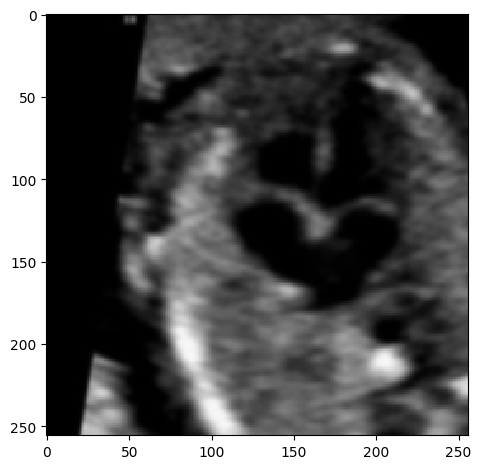

In [ ]:
# testing purposes

from skimage.io import imshow  # Import imshow from skimage.io
imshow(X_test[0])


(455, 350, 300)

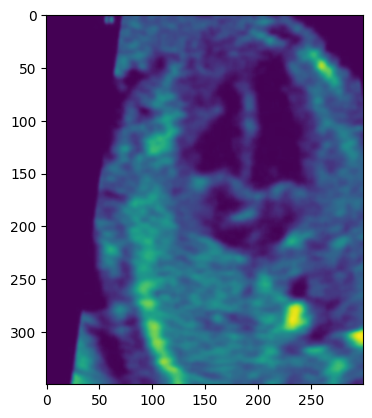

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module

plt.imshow(X_train[0]) # Use the imshow function from the imported module
type(X_train[0])
X_train.shape


In [ ]:
# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.keras', verbose = 1, save_best_only = True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir = 'logs')
            ]

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(455, 352, 304, 1)
(455, 352, 304, 1)


In [ ]:
Y_train = np.expand_dims(Y_train, axis=-1)  # Shape becomes (240, 512, 512, 1)



In [1]:
# IMPLEMENTATION OF U-NET
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model
from skimage.filters import threshold_otsu
from PIL import Image
from tqdm import tqdm
import os

# Define IMG_HEIGHT and IMG_WIDTH here
IMG_HEIGHT, IMG_WIDTH = 352, 304  # Example values, update as per your dataset

# Paths (Adjust as needed)
IMG_PATH = "/content/drive/MyDrive/Ultrasound/train-test-split/train/images/"
MASK_PATH = "/content/drive/MyDrive/Ultrasound/train-test-split/train/masks/"

# Get file names
train_data = sorted(os.listdir(IMG_PATH))  # Ensures consistency

# Initialize arrays
X_train = np.zeros((len(train_data), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.float32) # Initialize X_train
Y_train = np.zeros((len(train_data), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8) # Initialize y_train

# Data Preprocessing
for n, id_ in tqdm(enumerate(train_data), total=len(train_data)):
    img_path = os.path.join(IMG_PATH, id_)
    mask_path = os.path.join(MASK_PATH, id_)

    if not os.path.exists(img_path) or not os.path.exists(mask_path):
        print(f"⚠️ Error processing {id_}: File not found!")
        continue

    # Load and preprocess images
    img = Image.open(img_path).convert("L").resize((IMG_WIDTH, IMG_HEIGHT))
    mask = Image.open(mask_path).convert("L").resize((IMG_WIDTH, IMG_HEIGHT))

    img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize images
    mask_array = np.array(mask, dtype=np.uint8)

    # Apply Otsu thresholding to mask
    threshold_value = threshold_otsu(mask_array)
    mask_binary = (mask_array > threshold_value).astype(np.uint8)

    X_train[n] = np.expand_dims(img_array, axis=-1)  # Shape (H, W, 1)
    Y_train[n] = np.expand_dims(mask_binary, axis=-1)  # Shape (H, W, 1)

print(f"✅ Processed {len(train_data)} grayscale images and Otsu-thresholded masks!")


def unet_model(input_size=(IMG_HEIGHT, IMG_WIDTH, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u1 = UpSampling2D((2, 2))(c4)
    u1 = Concatenate()([u1, c3])
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    u2 = UpSampling2D((2, 2))(c5)
    u2 = Concatenate()([u2, c2])
    c6 = Conv2D(32, (3, 3), activation='relu', padding='same')(u2)
    c6 = Conv2D(32, (3, 3), activation='relu', padding='same')(c6)

    u3 = UpSampling2D((2, 2))(c6)
    u3 = Concatenate()([u3, c1])
    c7 = Conv2D(16, (3, 3), activation='relu', padding='same')(u3)
    c7 = Conv2D(16, (3, 3), activation='relu', padding='same')(c7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = Model(inputs, outputs)
    return model

# Create model
model = unet_model(input_size=(IMG_HEIGHT, IMG_WIDTH, 1)) # Adjust input_size
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42) # Split the data

# Train the model
BATCH_SIZE = 16 # Define batch size
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs = 15 ,
    batch_size=BATCH_SIZE
)

100%|██████████| 455/455 [00:12<00:00, 37.90it/s]


✅ Processed 455 grayscale images and Otsu-thresholded masks!


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 352, 304, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 352, 304, 16)   │            160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 352, 304, 16)   │          2,320 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 176, 152, 16)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 176, 152, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 176, 152, 32)   │          9,248 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 88, 76, 32)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 88, 76, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 88, 76, 64)     │         36,928 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 44, 38, 64)     │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 44, 38, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 44, 38, 128)    │        147,584 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 88, 76, 128)    │              0 │ conv2d_7[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 88, 76, 192)    │              0 │ up_sampling2d[0][0],   │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 88, 76, 64)     │        110,656 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 88, 76, 64)     │         36,928 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 176, 152, 64)   │              0 │ conv2d_9[0][0]         │
│ (UpSampling2D)       

 Total params: 487,009 (1.86 MB)

 Trainable params: 487,009 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 420s 18s/step - accuracy: 0.6808 - loss: 0.5312 - val_accuracy: 0.9580 - val_loss: 0.1052
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 405s 18s/step - accuracy: 0.9600 - loss: 0.0998 - val_accuracy: 0.9799 - val_loss: 0.0505
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 443s 18s/step - accuracy: 0.9825 - loss: 0.0434 - val_accuracy: 0.9873 - val_loss: 0.0308
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 449s 18s/step - accuracy: 0.9884 - loss: 0.0279 - val_accuracy: 0.9903 - val_loss: 0.0231
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 439s 18s/step - accuracy: 0.9902 - loss: 0.0232 - val_accuracy: 0.9908 - val_loss: 0.0219
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 435s 18s/step - accuracy: 0.9913 - loss: 0.0205 - val_accuracy: 0.9916 - val_loss: 0.0195
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 394s 17s/step - accuracy: 0.9910 - loss: 0.0211 - val_accuracy: 0.9921 - val_loss: 0.0186
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 458s 18s/step - accuracy: 0.9921 - loss: 0.0184 - val_accuracy: 0.

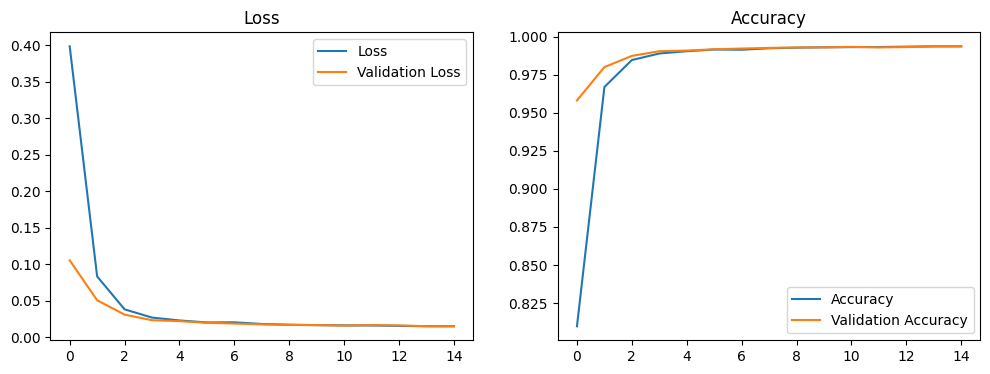

In [4]:
# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


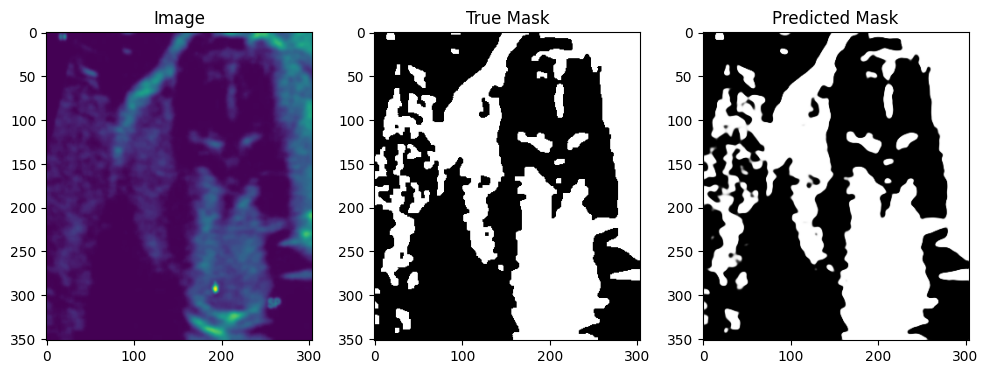

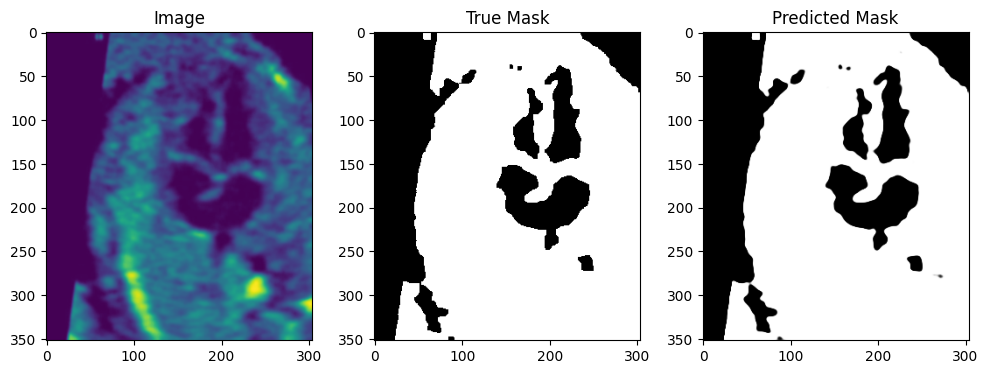

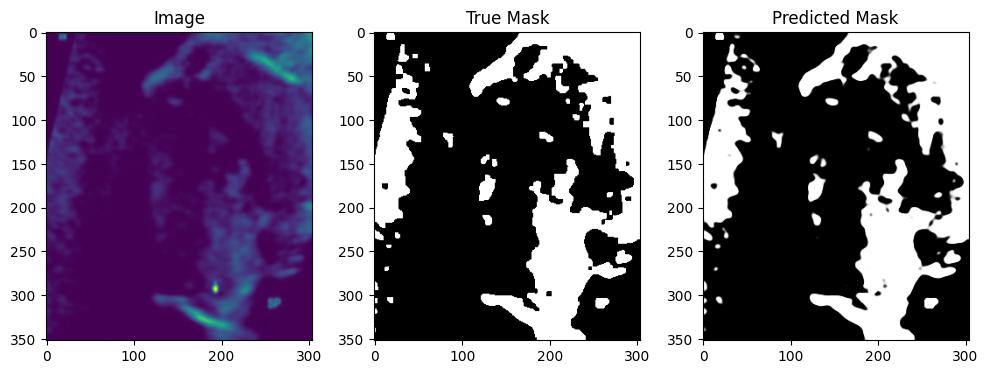

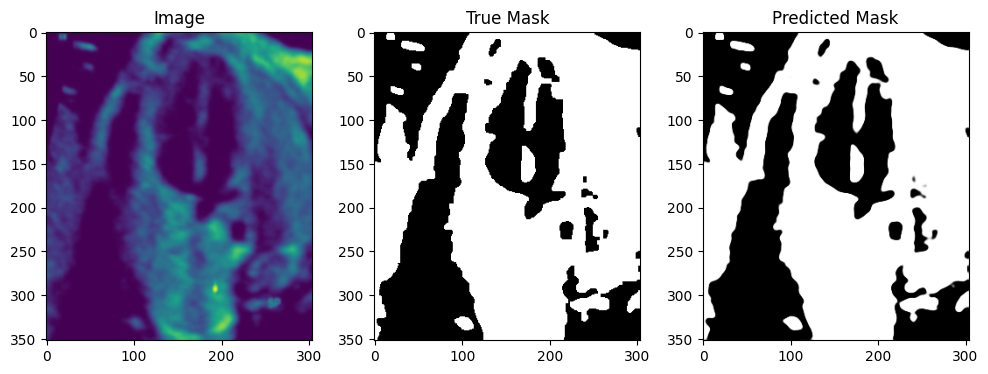

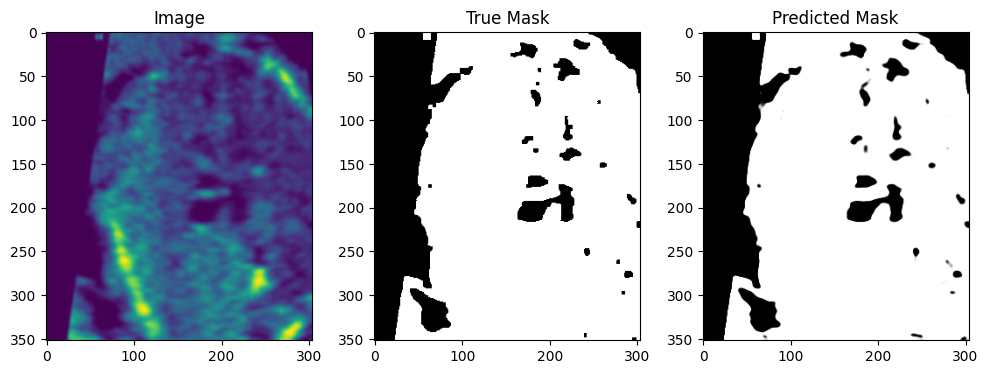

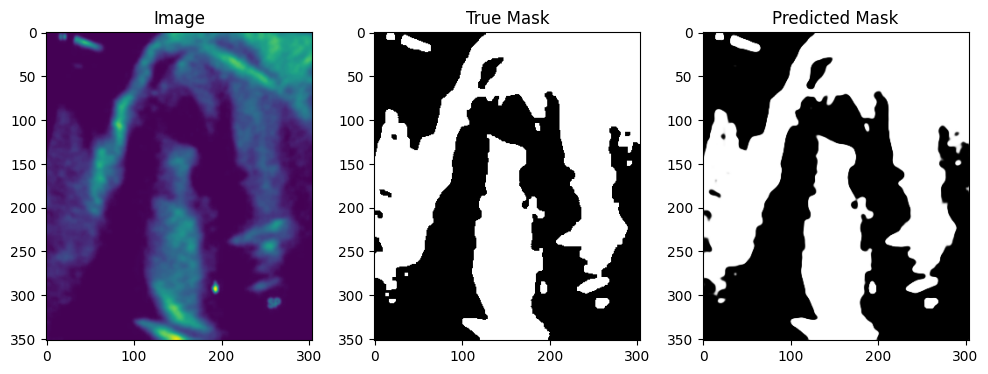

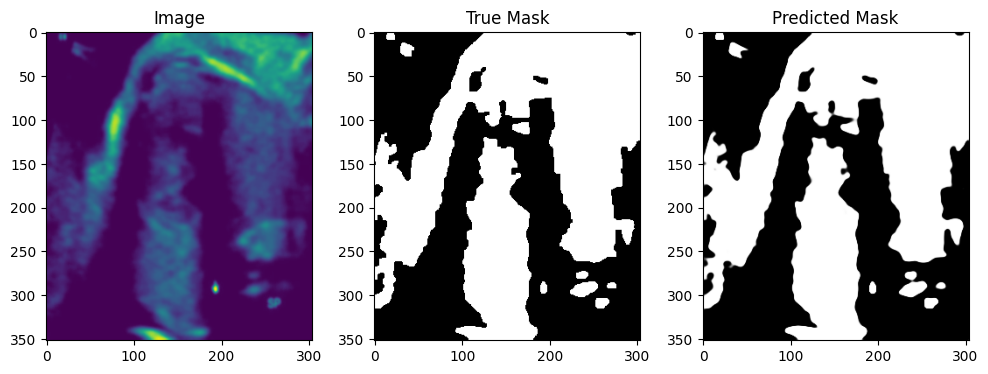

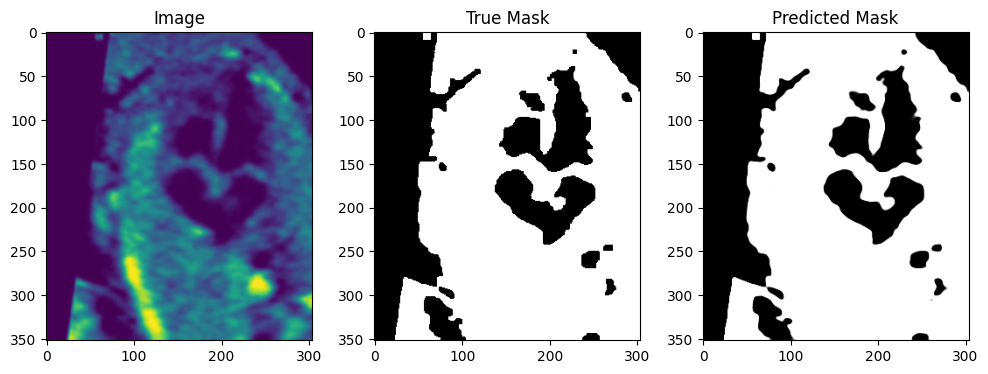

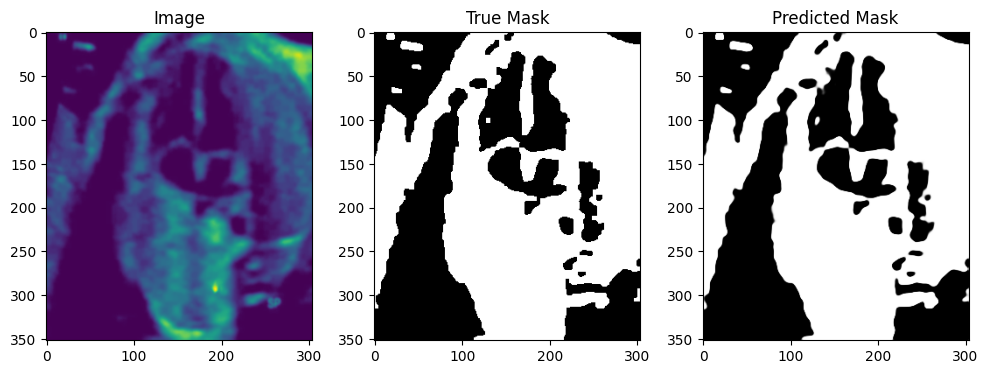

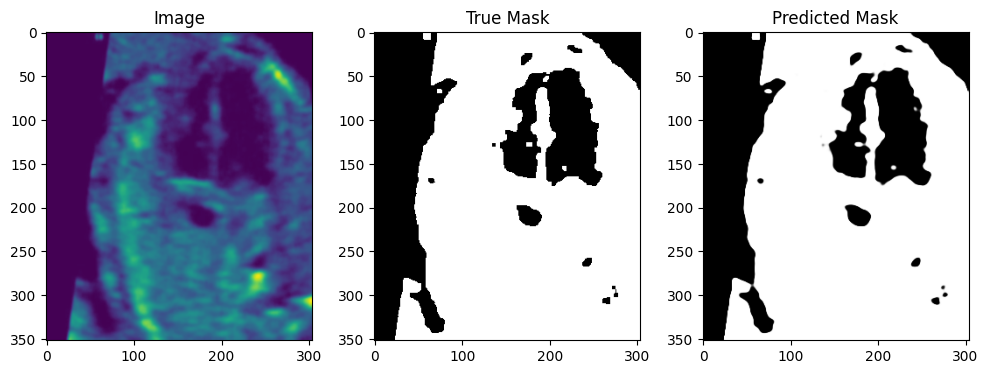

In [6]:
# Visualize predictions
def visualize_predictions(num_images=10):
    preds = model.predict(X_val[:num_images])

    for i in range(num_images):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title("Image")
        plt.imshow(X_val[i])

        plt.subplot(1, 3, 2)
        plt.title("True Mask")
        plt.imshow(y_val[i].squeeze(), cmap='gray')

        plt.subplot(1, 3, 3)
        plt.title("Predicted Mask")
        plt.imshow(preds[i].squeeze(), cmap='gray')

        plt.show()

visualize_predictions()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

📂 Folder: folder1


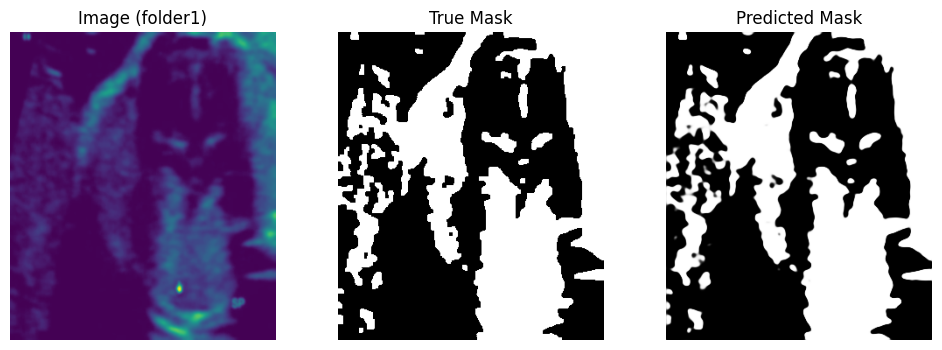

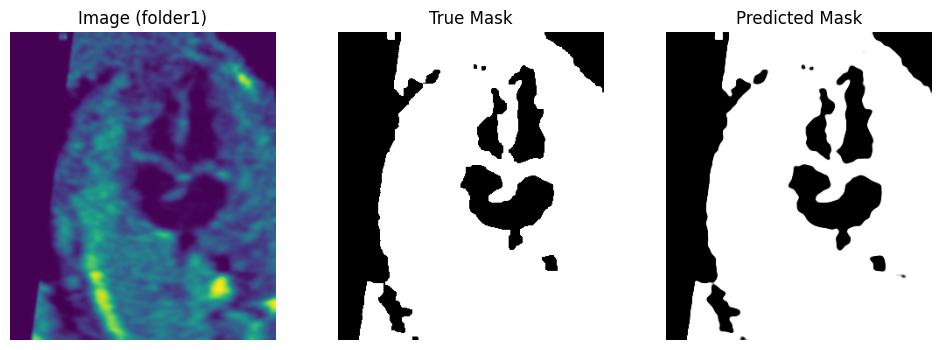

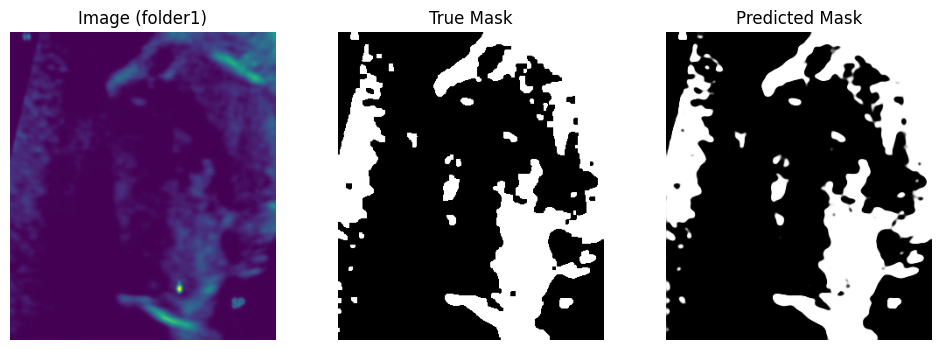

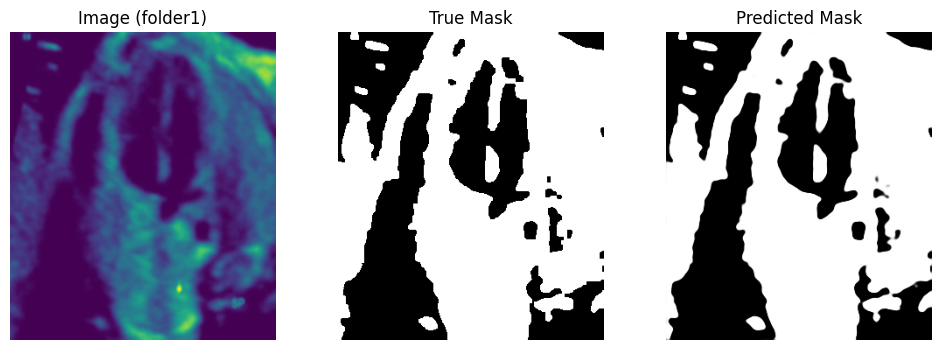

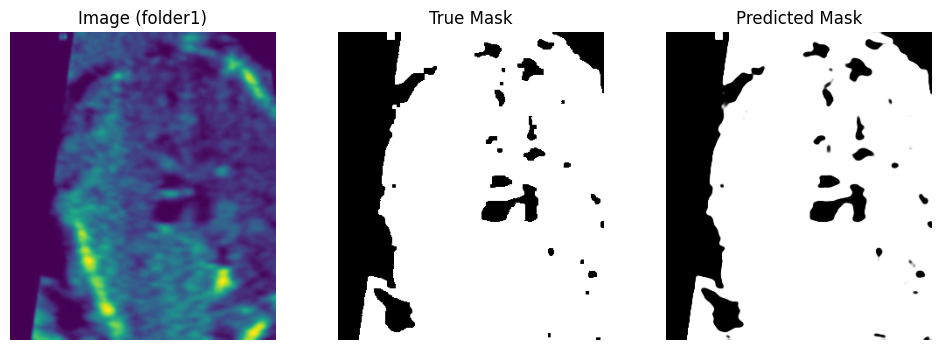

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

📂 Folder: folder2


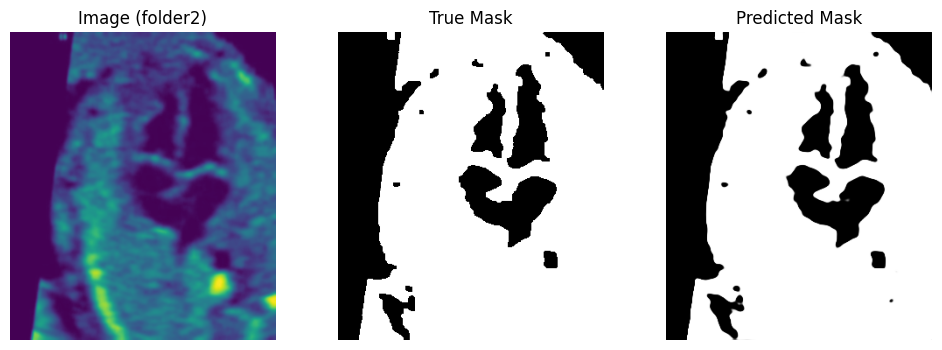

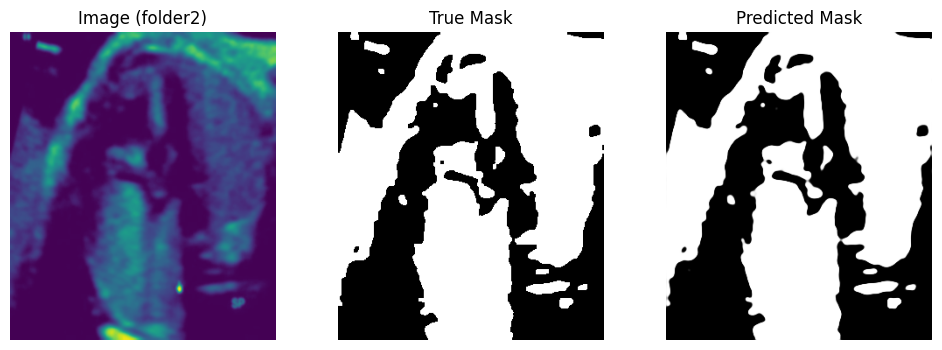

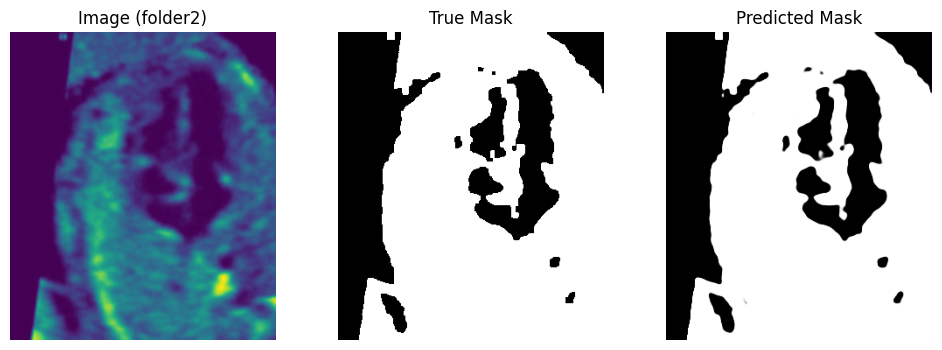

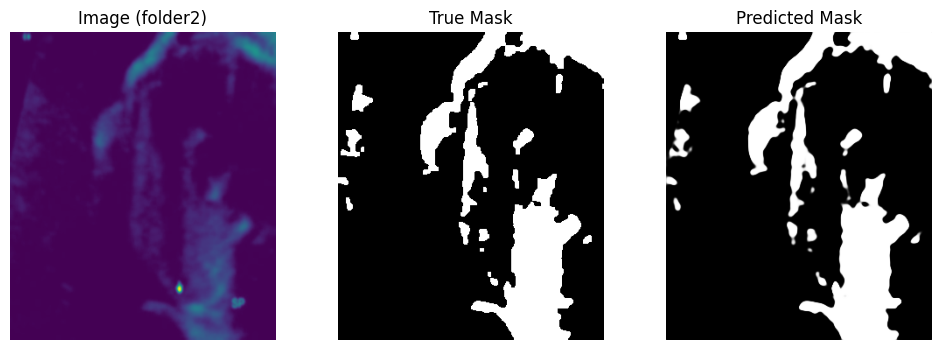

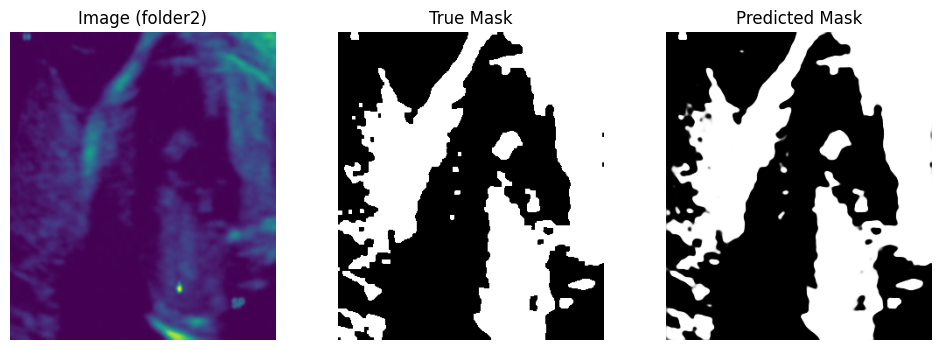

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

📂 Folder: folder3


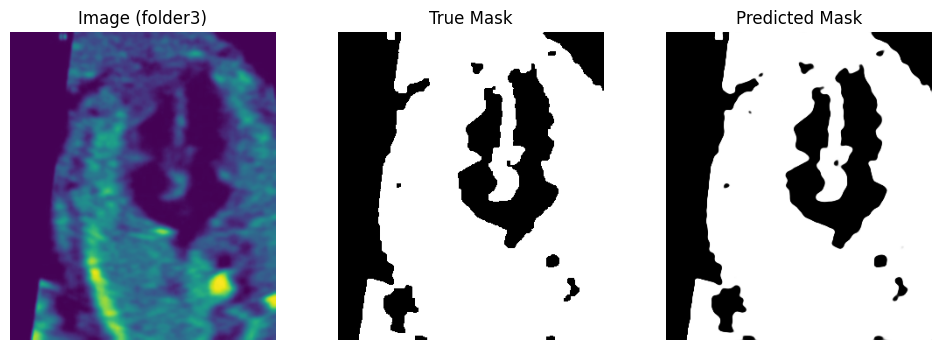

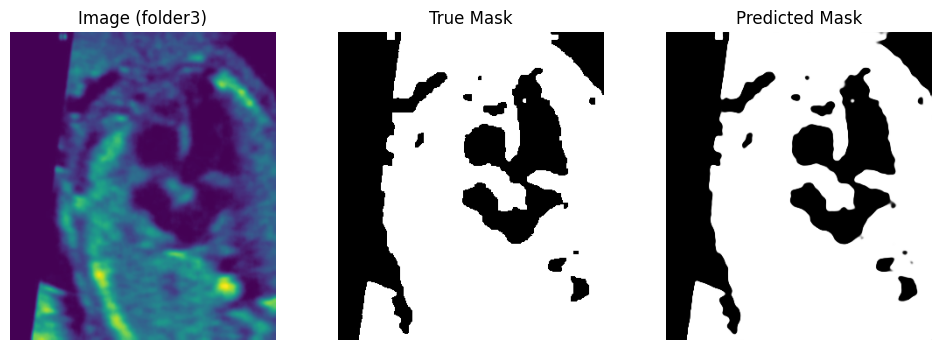

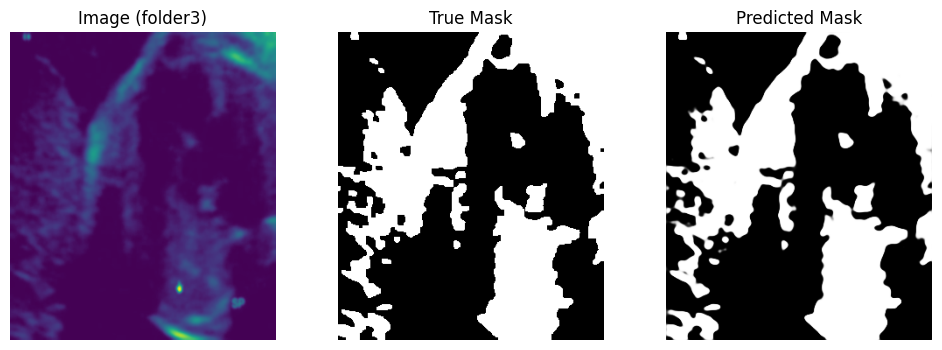

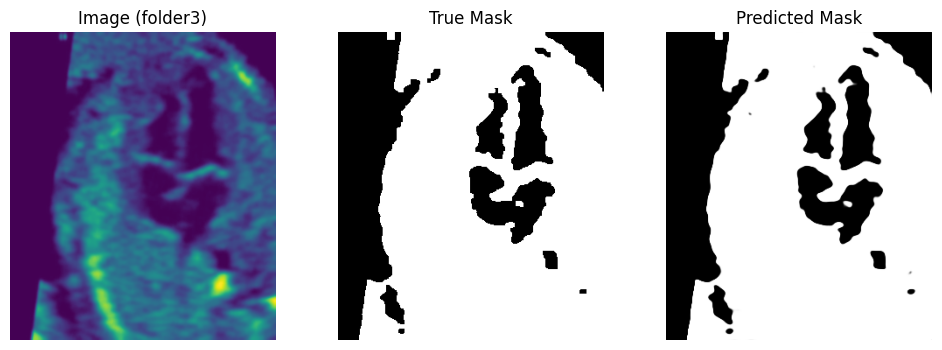

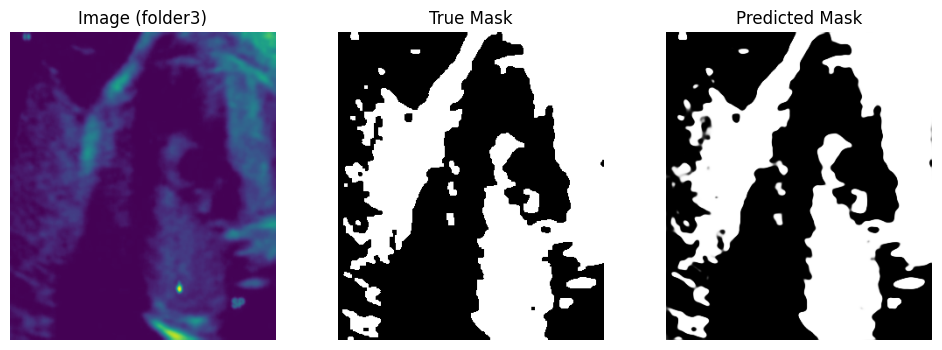

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

# 1. Assuming X_val and y_val are already split
# 2. We'll simulate splitting them by folder using indices

# Example: Splitting into 3 folders (adjust based on your actual folder structure)
folder_indices = {
    "folder1": list(range(0, 10)),  # Images 0-9 for folder1
    "folder2": list(range(10, 20)), # Images 10-19 for folder2
    "folder3": list(range(20, 30))  # Images 20-29 for folder3
}

X_val_folders = {}
y_val_folders = {}

for folder_name, indices in folder_indices.items():
    X_val_folders[folder_name] = X_val[indices]
    y_val_folders[folder_name] = y_val[indices]

def visualize_predictions_per_folder(num_images=5):
    for folder_name, X_images in X_val_folders.items():
        y_images = y_val_folders[folder_name]

        # Predict masks for this folder
        preds = model.predict(X_images[:num_images])

        print(f"\n📂 Folder: {folder_name}")

        for i in range(min(num_images, len(X_images))):
            plt.figure(figsize=(12, 4))

            # Display Original Image
            plt.subplot(1, 3, 1)
            plt.title(f"Image ({folder_name})")
            img = X_images[i]
            if img.ndim == 2:  # Grayscale image
                plt.imshow(img, cmap='gray')
            else:  # RGB image
                plt.imshow(img)
            plt.axis("off")

            # Display Ground Truth Mask
            plt.subplot(1, 3, 2)
            plt.title("True Mask")
            plt.imshow(np.squeeze(y_images[i]), cmap='gray')
            plt.axis("off")

            # Display Predicted Mask
            plt.subplot(1, 3, 3)
            plt.title("Predicted Mask")
            plt.imshow(np.squeeze(preds[i]), cmap='gray')
            plt.axis("off")

            plt.show()

# Call the function
visualize_predictions_per_folder(num_images=5)

In [16]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 352, 304, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 352, 304, 16)   │            160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 352, 304, 16)   │          2,320 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 176, 152, 16)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 176, 152, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 176, 152, 32)   │          9,248 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 88, 76, 32)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 88, 76, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 88, 76, 64)     │         36,928 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 44, 38, 64)     │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 44, 38, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 44, 38, 128)    │        147,584 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 88, 76, 128)    │              0 │ conv2d_7[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 88, 76, 192)    │              0 │ up_sampling2d[0][0],   │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 88, 76, 64)     │        110,656 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 88, 76, 64)     │         36,928 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 176, 152, 64)   │              0 │ conv2d_9[0][0]         │
│ (UpSampling2D)       

 Total params: 1,461,029 (5.57 MB)

 Trainable params: 487,009 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 974,020 (3.72 MB)

In [17]:
print(model.__class__.__name__)


Functional


In [18]:
print(model.get_config())


{'name': 'functional', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 352, 304, 1), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}, 'registered_name': None, 'name': 'input_layer', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 16, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activ

In [19]:
print(model.name)


functional


In [20]:
import tensorflow as tf

# Save the entire model
model.save("unet_model.h5")

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [21]:
# Load the saved model
model = tf.keras.models.load_model("unet_model.h5")

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [22]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
